In [1]:
import os, pandas as pd, numpy as np

In [2]:
os.chdir("C:\Assignment1")

In [3]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [4]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [5]:
RJ = df[df['state_1']=="RJ"]

In [6]:
RJ.isnull().sum().sort_values(ascending = False)

soyabean_v             4128
soyabean_q             4128
Otherwise_possessed    4053
Land_Leased_out        3969
Land_Leased_in         3671
                       ... 
radish_q                  0
brinjal_q                 0
tamato_q                  0
onion_q                   0
fv_tot                    0
Length: 384, dtype: int64

In [7]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [9]:
RJ_new = RJ[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [10]:
RJ_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       3
state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
dtype: int64

In [12]:
RJ_clean = RJ_new.copy()

In [13]:
RJ_clean.loc[:, 'Meals_At_Home'] = RJ_clean['Meals_At_Home'].fillna(RJ_new['Meals_At_Home'].mean())

In [14]:
RJ_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [15]:
# Outlier Checking

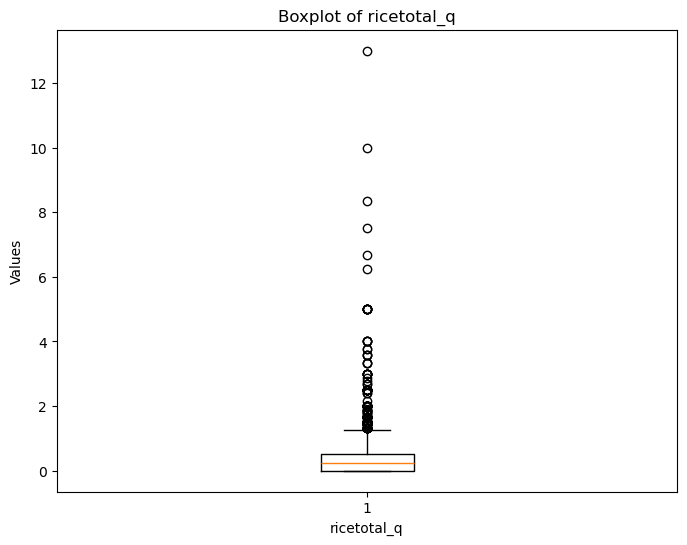

In [16]:
import matplotlib.pyplot as plt
# Assuming RJ_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(RJ_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [17]:
rice1 = RJ_clean['ricetotal_q'].quantile(0.25)
rice2 = RJ_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [18]:
RJ_clean=RJ_new[(RJ_new['ricetotal_q']<=up_limit)&(RJ_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x12eb6d45510>,
 'caps': [<matplotlib.lines.Line2D at 0x12eb6d46f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x12eb6d449d0>],
 'medians': [<matplotlib.lines.Line2D at 0x12eb6d48710>],
 'fliers': [<matplotlib.lines.Line2D at 0x12eb6d492d0>],
 'means': []}

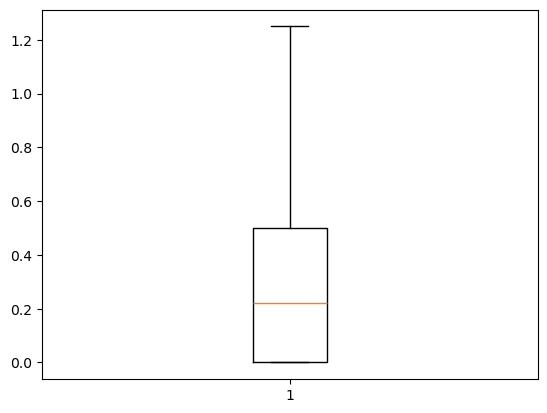

In [19]:
plt.boxplot(RJ_clean['ricetotal_q'])

In [20]:
RJ_clean['District'].unique()

array([12, 30, 23, 32, 31, 22, 13,  3,  1,  2,  4,  9, 10,  8, 11,  7,  6,
        5, 27, 21, 24, 26, 25, 20, 28, 19, 14, 29, 15, 18, 17, 16],
      dtype=int64)

In [21]:
# Replace values in the 'Sector' column
RJ_clean.loc[:,'Sector'] = RJ_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [22]:
#total consumption

In [23]:
RJ_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [25]:
RJ_clean.loc[:, 'total_consumption'] = RJ_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [26]:
RJ_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
32036,RJ,12,RURAL,2,82,0.666667,6.666667,0.166667,0,0.000,0.133333,31.673632,33.333333,54.0,72.640298
32037,RJ,12,RURAL,2,82,0.071429,7.142857,0.142857,0,0.000,0.114286,23.378053,27.142857,59.0,57.992339
32038,RJ,12,RURAL,2,82,0.250000,7.500000,0.125000,0,0.125,0.000000,25.175390,10.000000,60.0,43.175390
32039,RJ,12,RURAL,2,82,0.400000,7.000000,0.000000,0,0.400,0.160000,20.182280,0.000000,60.0,28.142280
32040,RJ,12,RURAL,2,82,0.500000,5.000000,0.142857,0,0.000,0.000000,27.671691,10.000000,60.0,43.314549


In [27]:
RJ_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                            
                     std       mean         max  min
Region                                              
1              32.640570  49.968634  492.109525  0.0
2              42.864497  61.669870  531.260920  0.0
3              44.608326  56.064365  657.007380  0.0
4              29.607550  52.187441  211.223800  0.0
5              38.970981  62.332580  572.954237  0.0

In [28]:
RJ_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                36.597696  67.102354  363.100180  24.137788
2                17.742843  52.467959  128.883708  21.775125
3                20.893966  46.147631  138.650138  19.150192
4                32.586464  66.652034  173.375540  25.140400
5                30.924732  65.557429  167.450450   0.000000
6                44.681424  64.326343  359.400000  21.452333
7                31.702769  57.263535  199.175475  15.930160
8                22.259799  48.296997  177.400475  17.758869
9                36.266288  57.683759  283.750300  24.816829
10               34.265426  61.116278  277.010850  20.000000
11               50.472632  62.216809  471.800725   0.000000
12               52.676637  66.497918  531.260920   0.000000
13               56.887713  64.099042  572.954237  23.250320
14               38.661672  55.852147  400.000000   0.000000
15               50.187993  61.830682  492.109525   0.000000
16               28.249216  46.597943  127.180500   0.000000
17               28.294738  47.002385  152.750292   0.000000
18               25.196996  46.345644  164.375475   0.000000
19               23.855154  38.888746  139.033637   0.000000
20               26.379500  52.074590  203.460645  18.820180
21               45.931916  64.764688  250.817233   0.000000
22               29.337744  59.578725  184.300333  23.997000
23               23.137316  49.115818  174.975750   0.000000
24               36.128184  59.479834  232.450750  16.100000
25               20.657693  49.639758  146.433717   0.000000
26               38.390418  53.911769  232.800549   0.000000
27               27.018390  44.697722  187.400740  14.616808
28               66.658304  71.578436  657.007380  20.887812
29               40.724216  60.493085  211.223800  21.120170
30               32.477059  54.957895  167.983550   7.925000
31               20.729776  51.986995  149.975675  21.824286
32               18.083671  42.207875  155.507132  18.766893

In [29]:
total_consumption_by_districtcode=RJ_clean.groupby('District')['total_consumption'].sum()

In [30]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
12    25136.212909
4     10597.673431
14    10500.203566
Name: total_consumption, dtype: float64

In [32]:
RJ_clean.loc[:,"District"] = RJ_clean.loc[:,"District"].replace({14: "Nagaur", 15: "Jodhpur", 12: "Jaipur", 13: "Sikar"})

In [33]:
total_consumption_by_districtname=RJ_clean.groupby('District')['total_consumption'].sum()

In [34]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Jaipur    25136.212909
4         10597.673431
Nagaur    10500.203566
Name: total_consumption, dtype: float64

In [35]:
from statsmodels.stats import weightstats as stests

In [36]:
rural=RJ_clean[RJ_clean['Sector']=="RURAL"]
urban=RJ_clean[RJ_clean['Sector']=="URBAN"]

In [37]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
32036,RJ,Jaipur,RURAL,2,82,0.666667,6.666667,0.166667,0,0.000,0.133333,31.673632,33.333333,54.0,72.640298
32037,RJ,Jaipur,RURAL,2,82,0.071429,7.142857,0.142857,0,0.000,0.114286,23.378053,27.142857,59.0,57.992339
32038,RJ,Jaipur,RURAL,2,82,0.250000,7.500000,0.125000,0,0.125,0.000000,25.175390,10.000000,60.0,43.175390
32039,RJ,Jaipur,RURAL,2,82,0.400000,7.000000,0.000000,0,0.400,0.160000,20.182280,0.000000,60.0,28.142280
32040,RJ,Jaipur,RURAL,2,82,0.500000,5.000000,0.142857,0,0.000,0.000000,27.671691,10.000000,60.0,43.314549


In [38]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
88500,RJ,23,URBAN,4,84,0.20,15.0,0.100000,0,0.0,0.0000,34.345397,23.205000,60.0,72.850397
88501,RJ,23,URBAN,4,84,0.25,10.0,0.250000,0,0.0,0.0625,26.150399,4.250000,58.0,40.962899
88502,RJ,23,URBAN,4,84,0.10,16.0,0.050000,0,0.0,0.0000,39.500760,40.000000,58.0,95.650760
88503,RJ,23,URBAN,4,84,0.05,14.0,0.020000,0,0.0,0.0000,36.780331,12.000000,52.0,62.850331
88504,RJ,23,URBAN,4,84,0.10,9.0,0.166667,0,0.0,0.0000,31.917043,8.333333,60.0,49.517043


In [39]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [40]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 7.645989273346268
P-Value: 2.073449535560885e-14
